# Imports

In [ ]:
import keras
import datasets
import numpy as np
import transformers
import sklearn.metrics
import tensorflow as tf
import tqdm.notebook as tqdm
import sklearn.model_selection
import matplotlib.pyplot as plt

In [10]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except:
        pass

# Dataset

Load the dataset (we will be using [go_emotions](https://huggingface.co/datasets/google-research-datasets/go_emotions)). Pretokenize data or make a loader that tokenizes the sentenses as you iterate through the dataset. Implement two datasets: variable and fixed sentence length (in tokens). Don't forget to split the dataset into train and test subsets

In [11]:
dataset = datasets.load_dataset('google-research-datasets/go_emotions', name='raw', split='train')

In [12]:
emotions = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
    'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
    'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
    'remorse', 'sadness', 'surprise', 'neutral'
]

In [13]:
tokenizer = transformers.AutoTokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

In [21]:
texts = dataset['text']

In [38]:
texts

Column(['That game hurt.', ' >sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of "grouping" ', "You do right, if you don't care then fuck 'em!", 'Man I love reddit.', '[NAME] was nowhere near them, he was by the Falcon. '])

In [22]:
labels = np.array([[row[emotion] for emotion in emotions]for row in dataset])

In [23]:
labels

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    texts, 
    labels,
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

In [28]:
sizes = [len(tokenizer(text)['input_ids']) for text in texts]

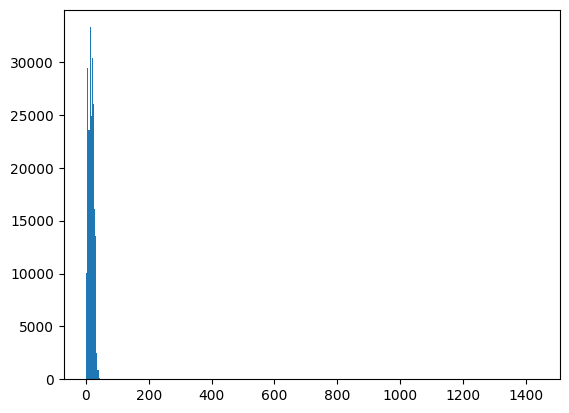

In [32]:
plt.hist(sizes, bins=400);

In [39]:
max_size = int(np.quantile(sizes, 0.99))

# Model

Implement your model. The model should have the RNN architecture (with LSTM or GRU cells), support stacking and bidirectional feature extraction.

In [50]:
def get_name(prefix: str | None = None, suffix: str | None = None, separator: str = '_') -> str | None:
    return prefix and prefix + separator + suffix or suffix or None

In [ ]:
def get_model(
    units: int,
    n_tokens: int,
    n_labels: int,
    n_stacks: int = 1,
    bidirectional: bool = False,
    name: str | None = None,
    cell_type: type[keras.layers.Layer] = keras.layers.LSTMCell
) -> keras.Model:
    '''Creates a model with RNN architecture for sequence multilabel classification.

    Arguments:
        units: dimensionality of RNN cells
        n_tokens: number of tokens in the tokenizer dictionary
        n_labels: number of labels to be predicted
        n_stacks: number of RNN cells in the stack (1 -- no stacking)
        bidirectional: whether or not the model is bidirectional
        name: the model name
        cell_type: type of a cell to use, either keras.layers.LSTMCell or keras.layers.GRUCell

    Returns:
        The model'''
        
    reset_gate = keras.layers.Dense(
                 units, 
                 activation='sigmoid', 
                 name=get_name(name, 'reset_gate')
                 )
    update_gate = keras.layers.Dense(
                  units,
                  activation='sigmoid',
                  name=get_name(name, 'update_unit')
                  )
    output_gate = keras.layers.Dense(
                  units,
                  activation='tanh',
                  name=get_name(name, 'ouput_gate')
                  )
    

# Training

Train several models on the two dataset variants. Use either of the cell types (LSTM or GRU)
* Simple RNN (no stacking, one direction)
* Stacked RNN (stacking, one direction)
* Bidirectional RNN (no stacking, bidirectional)
* Stacked Bidirectional RNN (stacking, bidirectional)

In [ ]:
models = [
    get_model(
        units=...,
        n_tokens=len(tokenizer.get_vocab()),
        n_labels=len(emotions),
        name=...,
        bidirectional=...,
        n_stacks=...,
        cell_type=...
    )
    for ... in ...
]

Which loss should be used to multilabel classification? Which metrics?

In [ ]:
for model in models:
    model.compile(
        loss=...,
        optimizer=keras.optimizers.Adam(
            ...
        ),
        metrics=[
            ...
        ]
    )

In [ ]:
for train_dataset, test_dataset in datasets:
    for model in models:
        model.fit(train_dataset, validation_data=test_dataset, epochs=...)

# Evaluation

Evaluate the models you trained on the test datasets. Plot ROC curves for each label (use `sklearn.metrics.RocCurveDisplay`) for each model.

In [ ]:
def plot_roc_curve(
    X: np.ndarray,
    y: np.ndarray,
    model: keras.Model,
    ax: plt.Axes | None = None
) -> float:
    '''Plots ROC curves for each of the labels (on a single axes) and outputs mean ROC AUC score.

    Arguments:
        X: model inputs
        y: ground thruths
        model: model to plot the curve for
        ax: axes to plot on

    Returns:
        Mean ROC AUC score'''

Plot the mean ROC AUC scores. Which model has the highest score? On what kind of dataset?

Inspect the best model performance closer. Come up with some sentences (in English). Does the model output sensible results?

In [ ]:
def label_text(text: str, model: keras.Model, threshold: float = 0.5, max_length: int | None = None) -> list[str]:
    '''Computes the model output for `text` and outputs a list of emotions that have a probability of at least `threshold`

    Arguments:
        text: text to label
        model: model to use
        threshold: threshold to use
        max_length: max length for tokenization
    
    Return:
        List of predicted emotion labels'''

In [ ]:
def plot_emotion_scores(text: str, model: keras.Model, max_length: int | None = None, ax: plt.Axes | None = None):
    '''Plots a bar plot of emotion probabilities for given `text` using `model`.

    Arguments:
        text: text to label
        model: model to use        
        max_length: max length for tokenization
        ax: axes to plot on'''

For each of your texts get a list of emotion labels and plot emotion scores

# Bonus

Train and evaluate the same model as your best one, but use a different cell type